***Getting Camera Parameters***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from camutils import Camera,triangulate,calibratePose,makerotation,decode,reconstruct,meshGen
import pickle
import visutils
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import cv2
import meshutils

%matplotlib notebook

Camera : 
 f=1404.6009661788062 
 c=[[962.16736916 590.91595682]] 
 R=[[ 0.03843674  0.98947412  0.13951197]
 [ 0.9773577  -0.00815434 -0.21143659]
 [-0.2080734   0.14448004 -0.96738357]] 
 t = [[ 6.86588608 19.52347142 47.34419122]]
Camera : 
 f=1404.6009661788062 
 c=[[962.16736916 590.91595682]] 
 R=[[-0.00259871  0.99096865  0.13406855]
 [ 0.99277875 -0.01352251  0.11919521]
 [ 0.11993166  0.13341016 -0.98377748]] 
 t = [[ 7.50010617  7.20926293 47.76495312]]


<IPython.core.display.Javascript object>


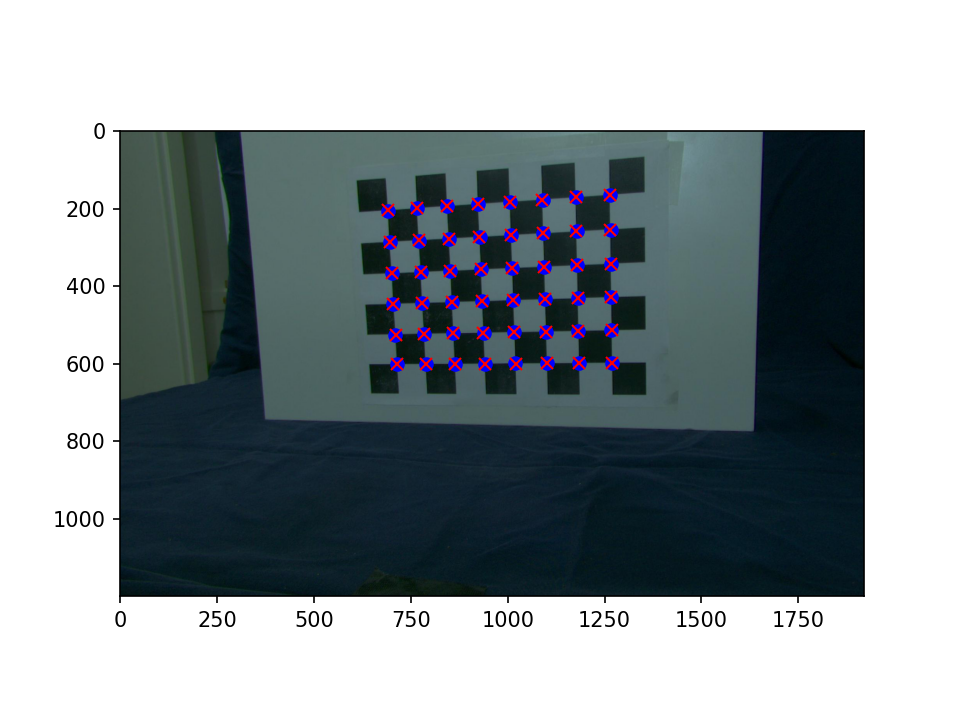

<IPython.core.display.Javascript object>


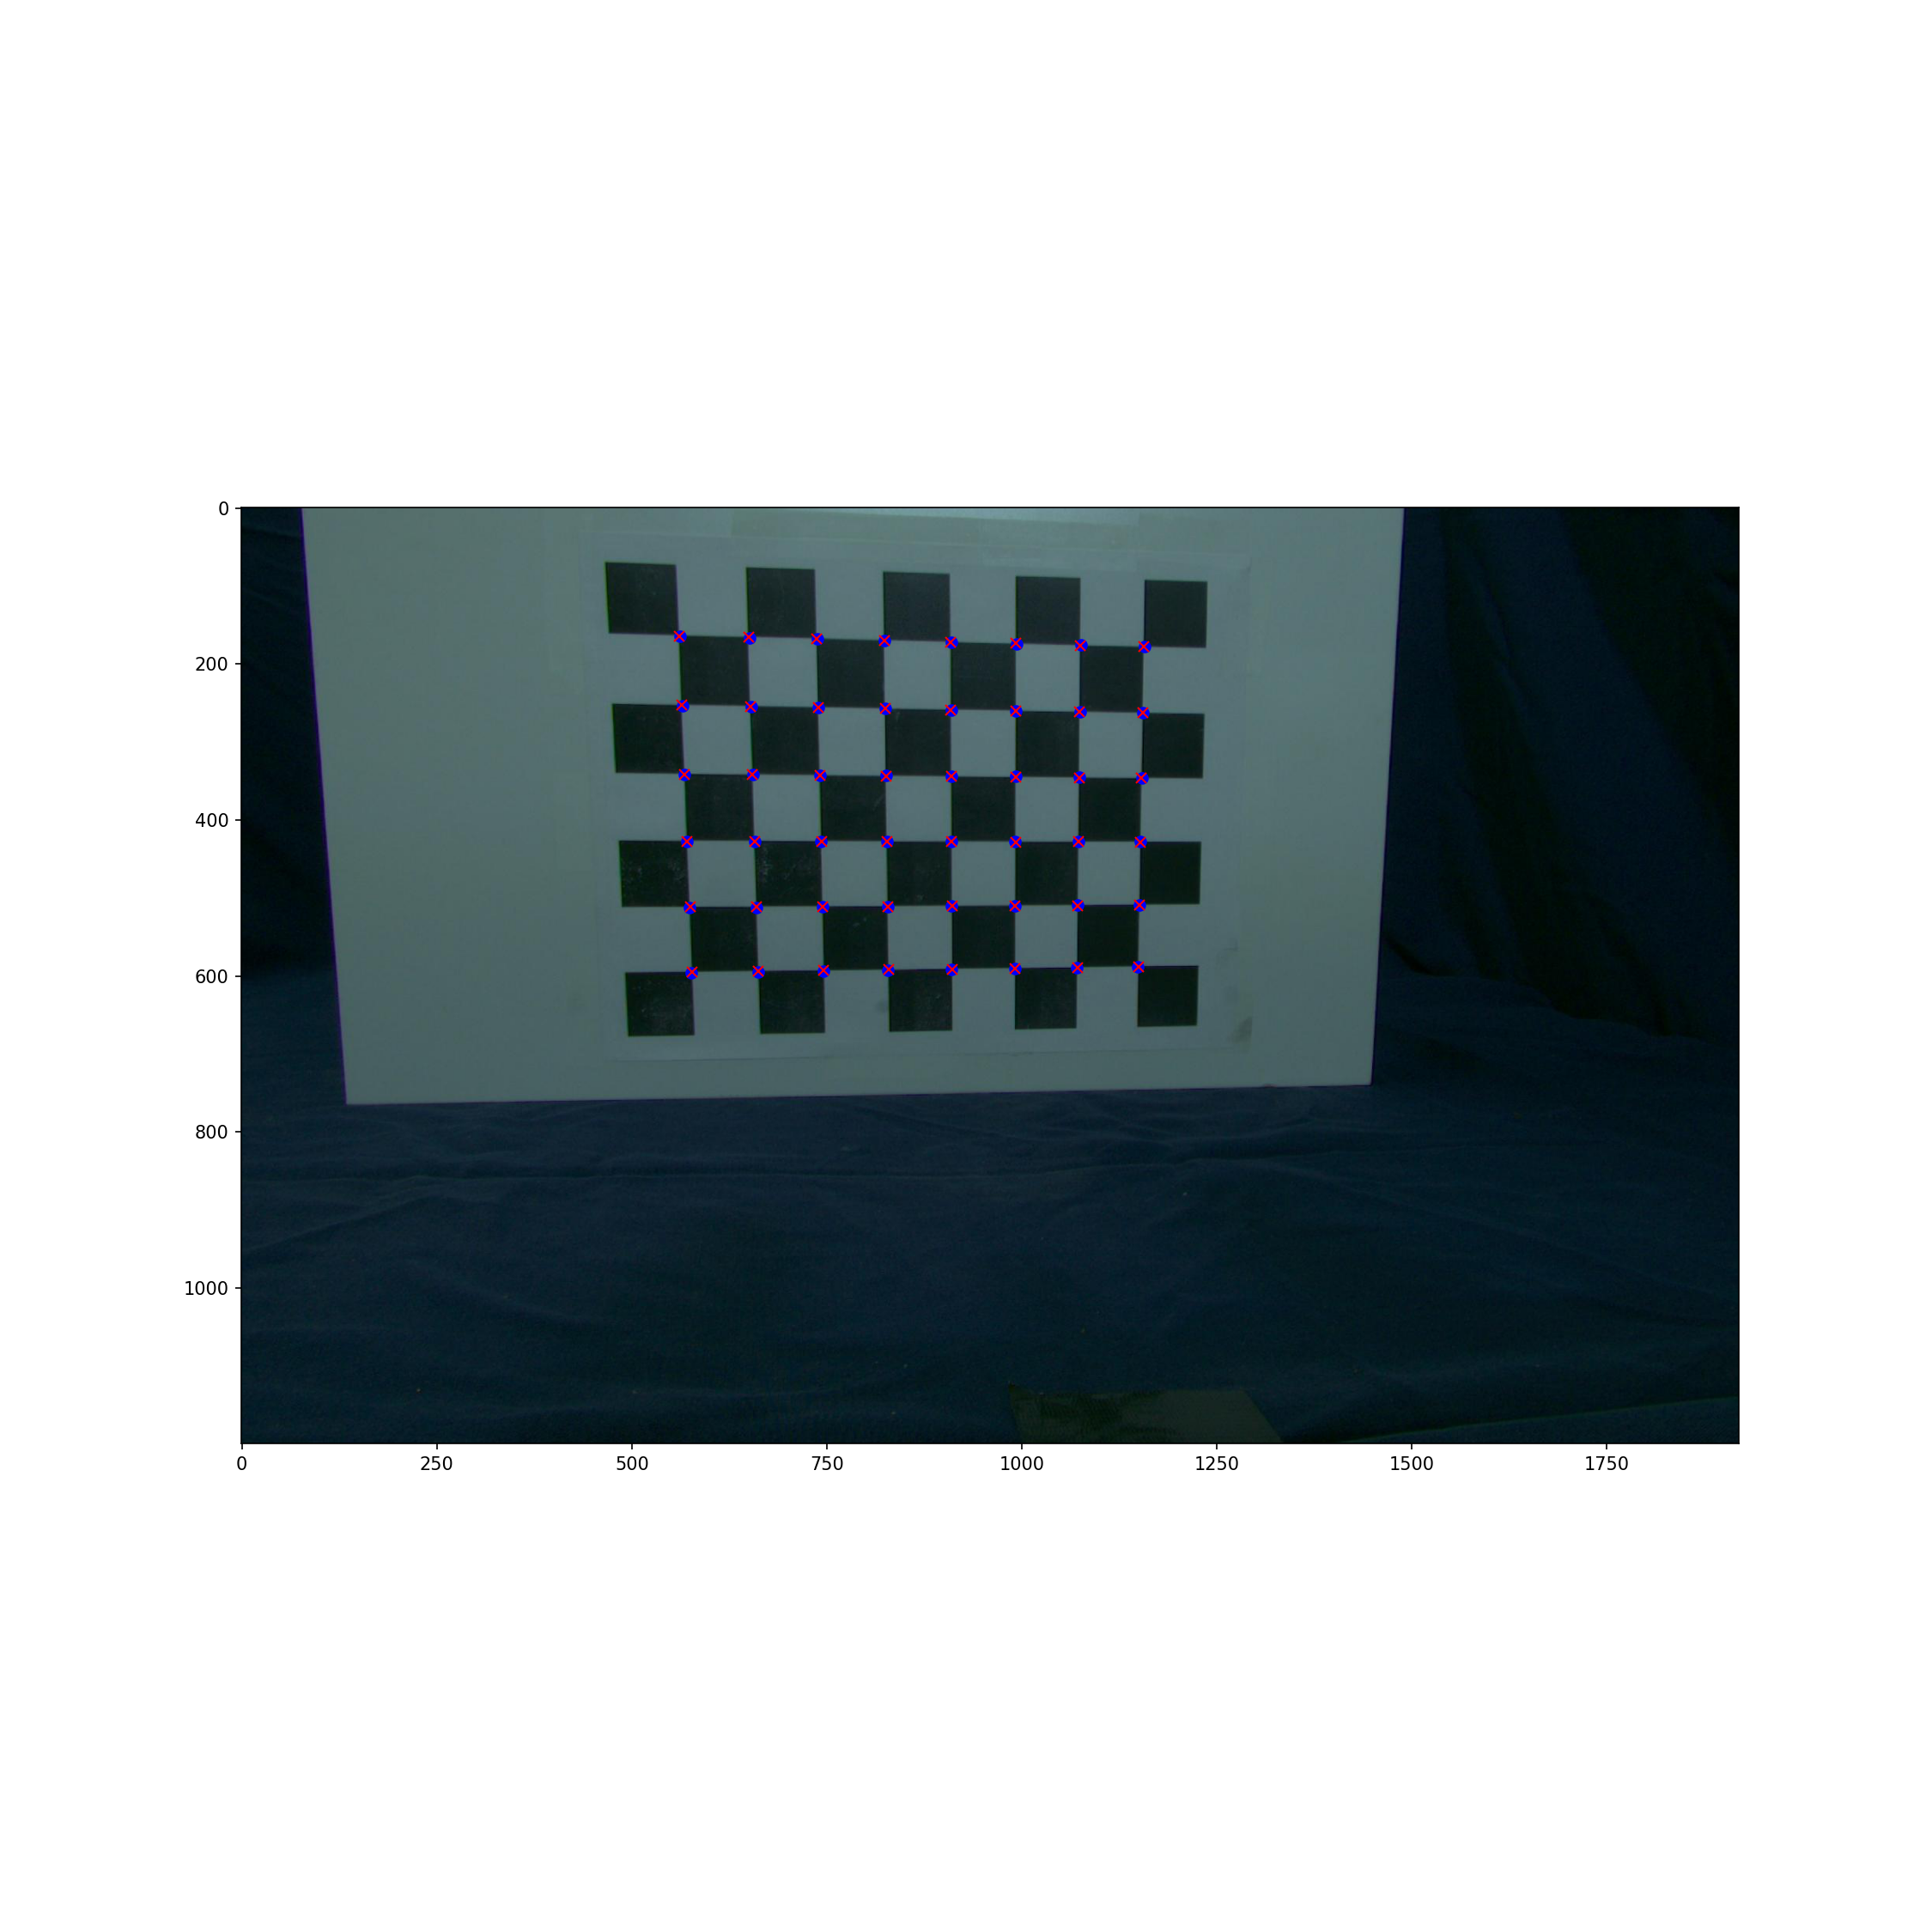

In [3]:


# load in the intrinsic camera parameters from 'calibration.pickle'
with open('calibration.pickle', 'rb') as f:
    infile = pickle.load(f)
    
f = (infile["fx"] + infile["fy"]) / 2
# create Camera objects representing the left and right cameras
# use the known intrinsic parameters you loaded in.
camL = Camera(f ,np.array([[infile["cx"]], [infile["cy"]]]) ,np.array([[0,0,0]]).T, makerotation(0,0,0) )
camR = Camera(f ,np.array([[infile["cx"]], [infile["cy"]]]) ,np.array([[0,0,0]]).T, makerotation(0,0,0) )

# load in the left and right images and find the coordinates of
# the chessboard corners using OpenCV
imgL = plt.imread('calib_jpg_u/frame_C0_01.jpg')
ret, cornersL = cv2.findChessboardCorners(imgL, (8,6), None)
pts2L = cornersL.squeeze().T

imgR = plt.imread('calib_jpg_u/frame_C1_01.jpg')
ret, cornersR = cv2.findChessboardCorners(imgR, (8,6), None)
pts2R = cornersR.squeeze().T

# generate the known 3D point coordinates of points on the checkerboard in cm
pts3 = np.zeros((3,6*8))
yy,xx = np.meshgrid(np.arange(8),np.arange(6))
pts3[0,:] = 2.8*xx.reshape(1,-1)
pts3[1,:] = 2.8*yy.reshape(1,-1)


# Now use your calibratePose function to get the extrinsic parameters
# for the two images. You may need to experiment with the initialization
# in order to get a good result

left_init = np.array([0,0,0,0,0,-2])
right_init = np.array([0,0,0,0,0,-2])

camL = calibratePose(pts3,pts2L,camL,left_init)
camR = calibratePose(pts3,pts2R,camR,right_init)

print(camL)
print(camR)

# As a final test, triangulate the corners of the checkerboard to get back there 3D locations
pts3r = triangulate(pts2L, camL, pts2R, camR)

# Display the reprojected points overlayed on the images to make 
# sure they line up
plt.figure()
pts2Lp = camL.project(pts3)
plt.imshow(imgL)
plt.plot(pts2Lp[0,:],pts2Lp[1,:],'bo')
plt.plot(pts2L[0,:],pts2L[1,:],'rx')
plt.show()

pts2Rp = camR.project(pts3)
plt.figure()
plt.imshow(imgR)
plt.plot(pts2Rp[0,:],pts2Rp[1,:],'bo')
plt.plot(pts2R[0,:],pts2R[1,:],'rx')
plt.show()


*** Reconstruct Function with Modifications ***

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )



<IPython.core.display.Javascript object>


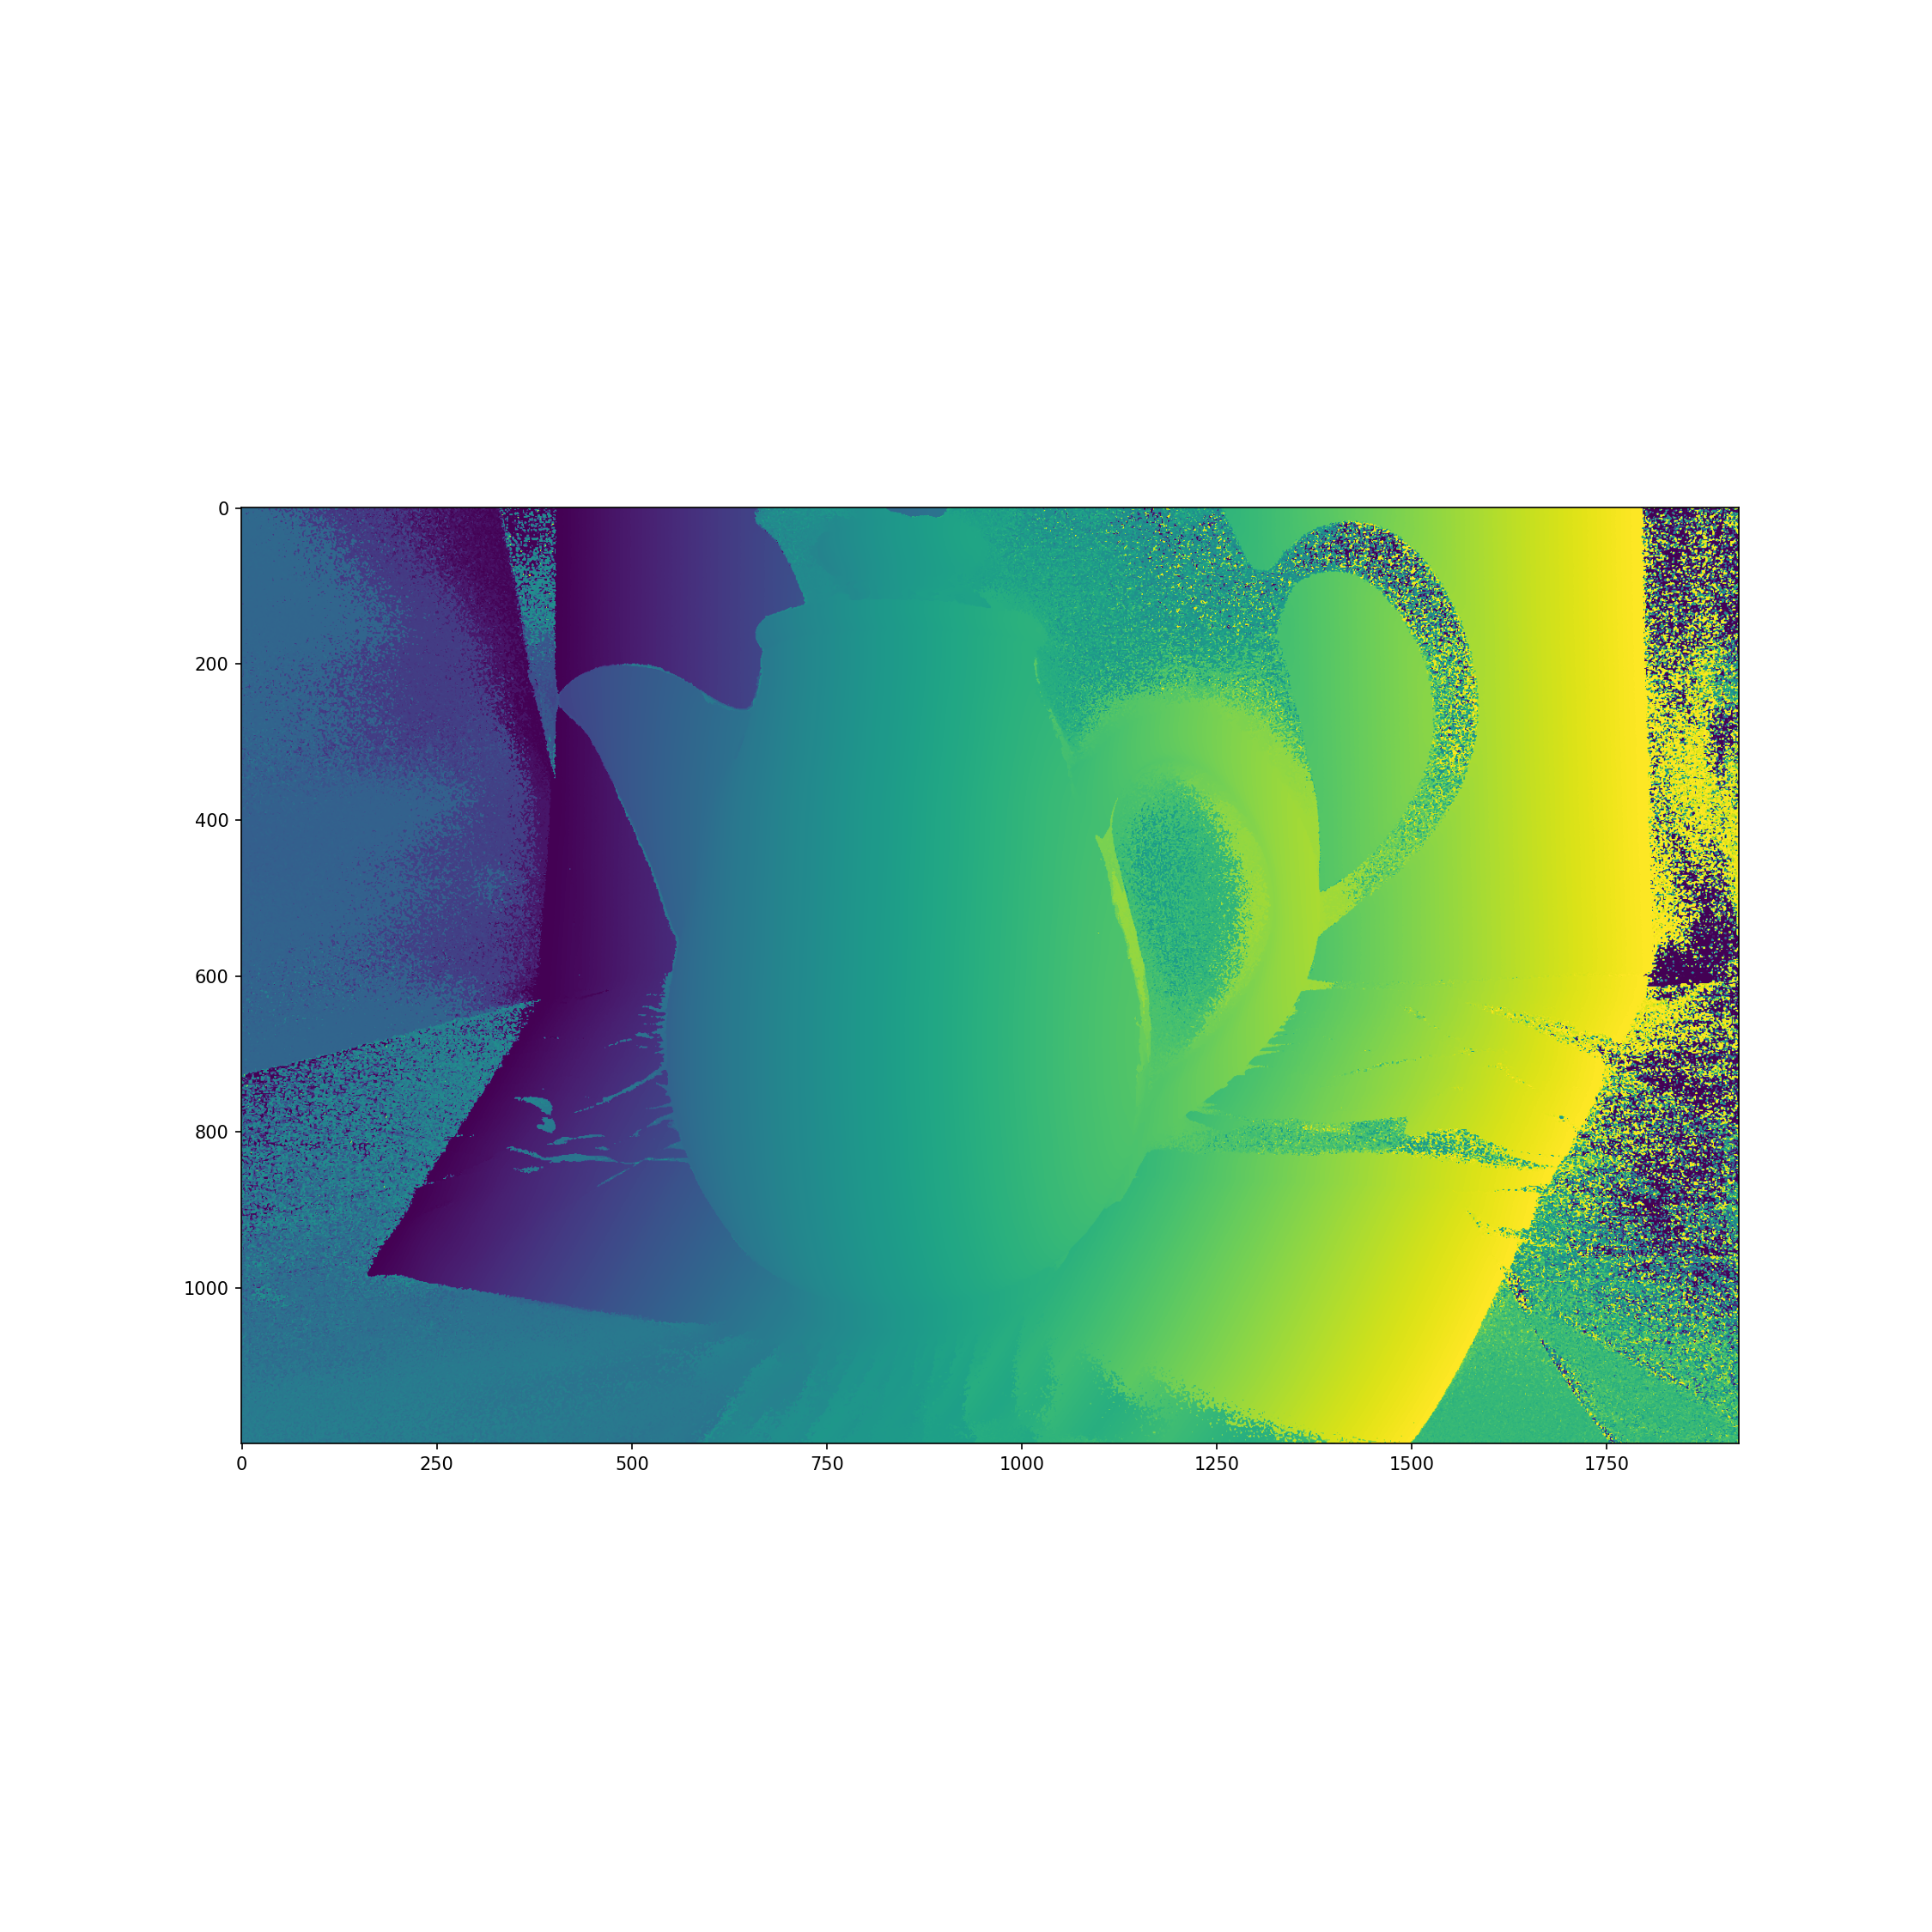

<IPython.core.display.Javascript object>


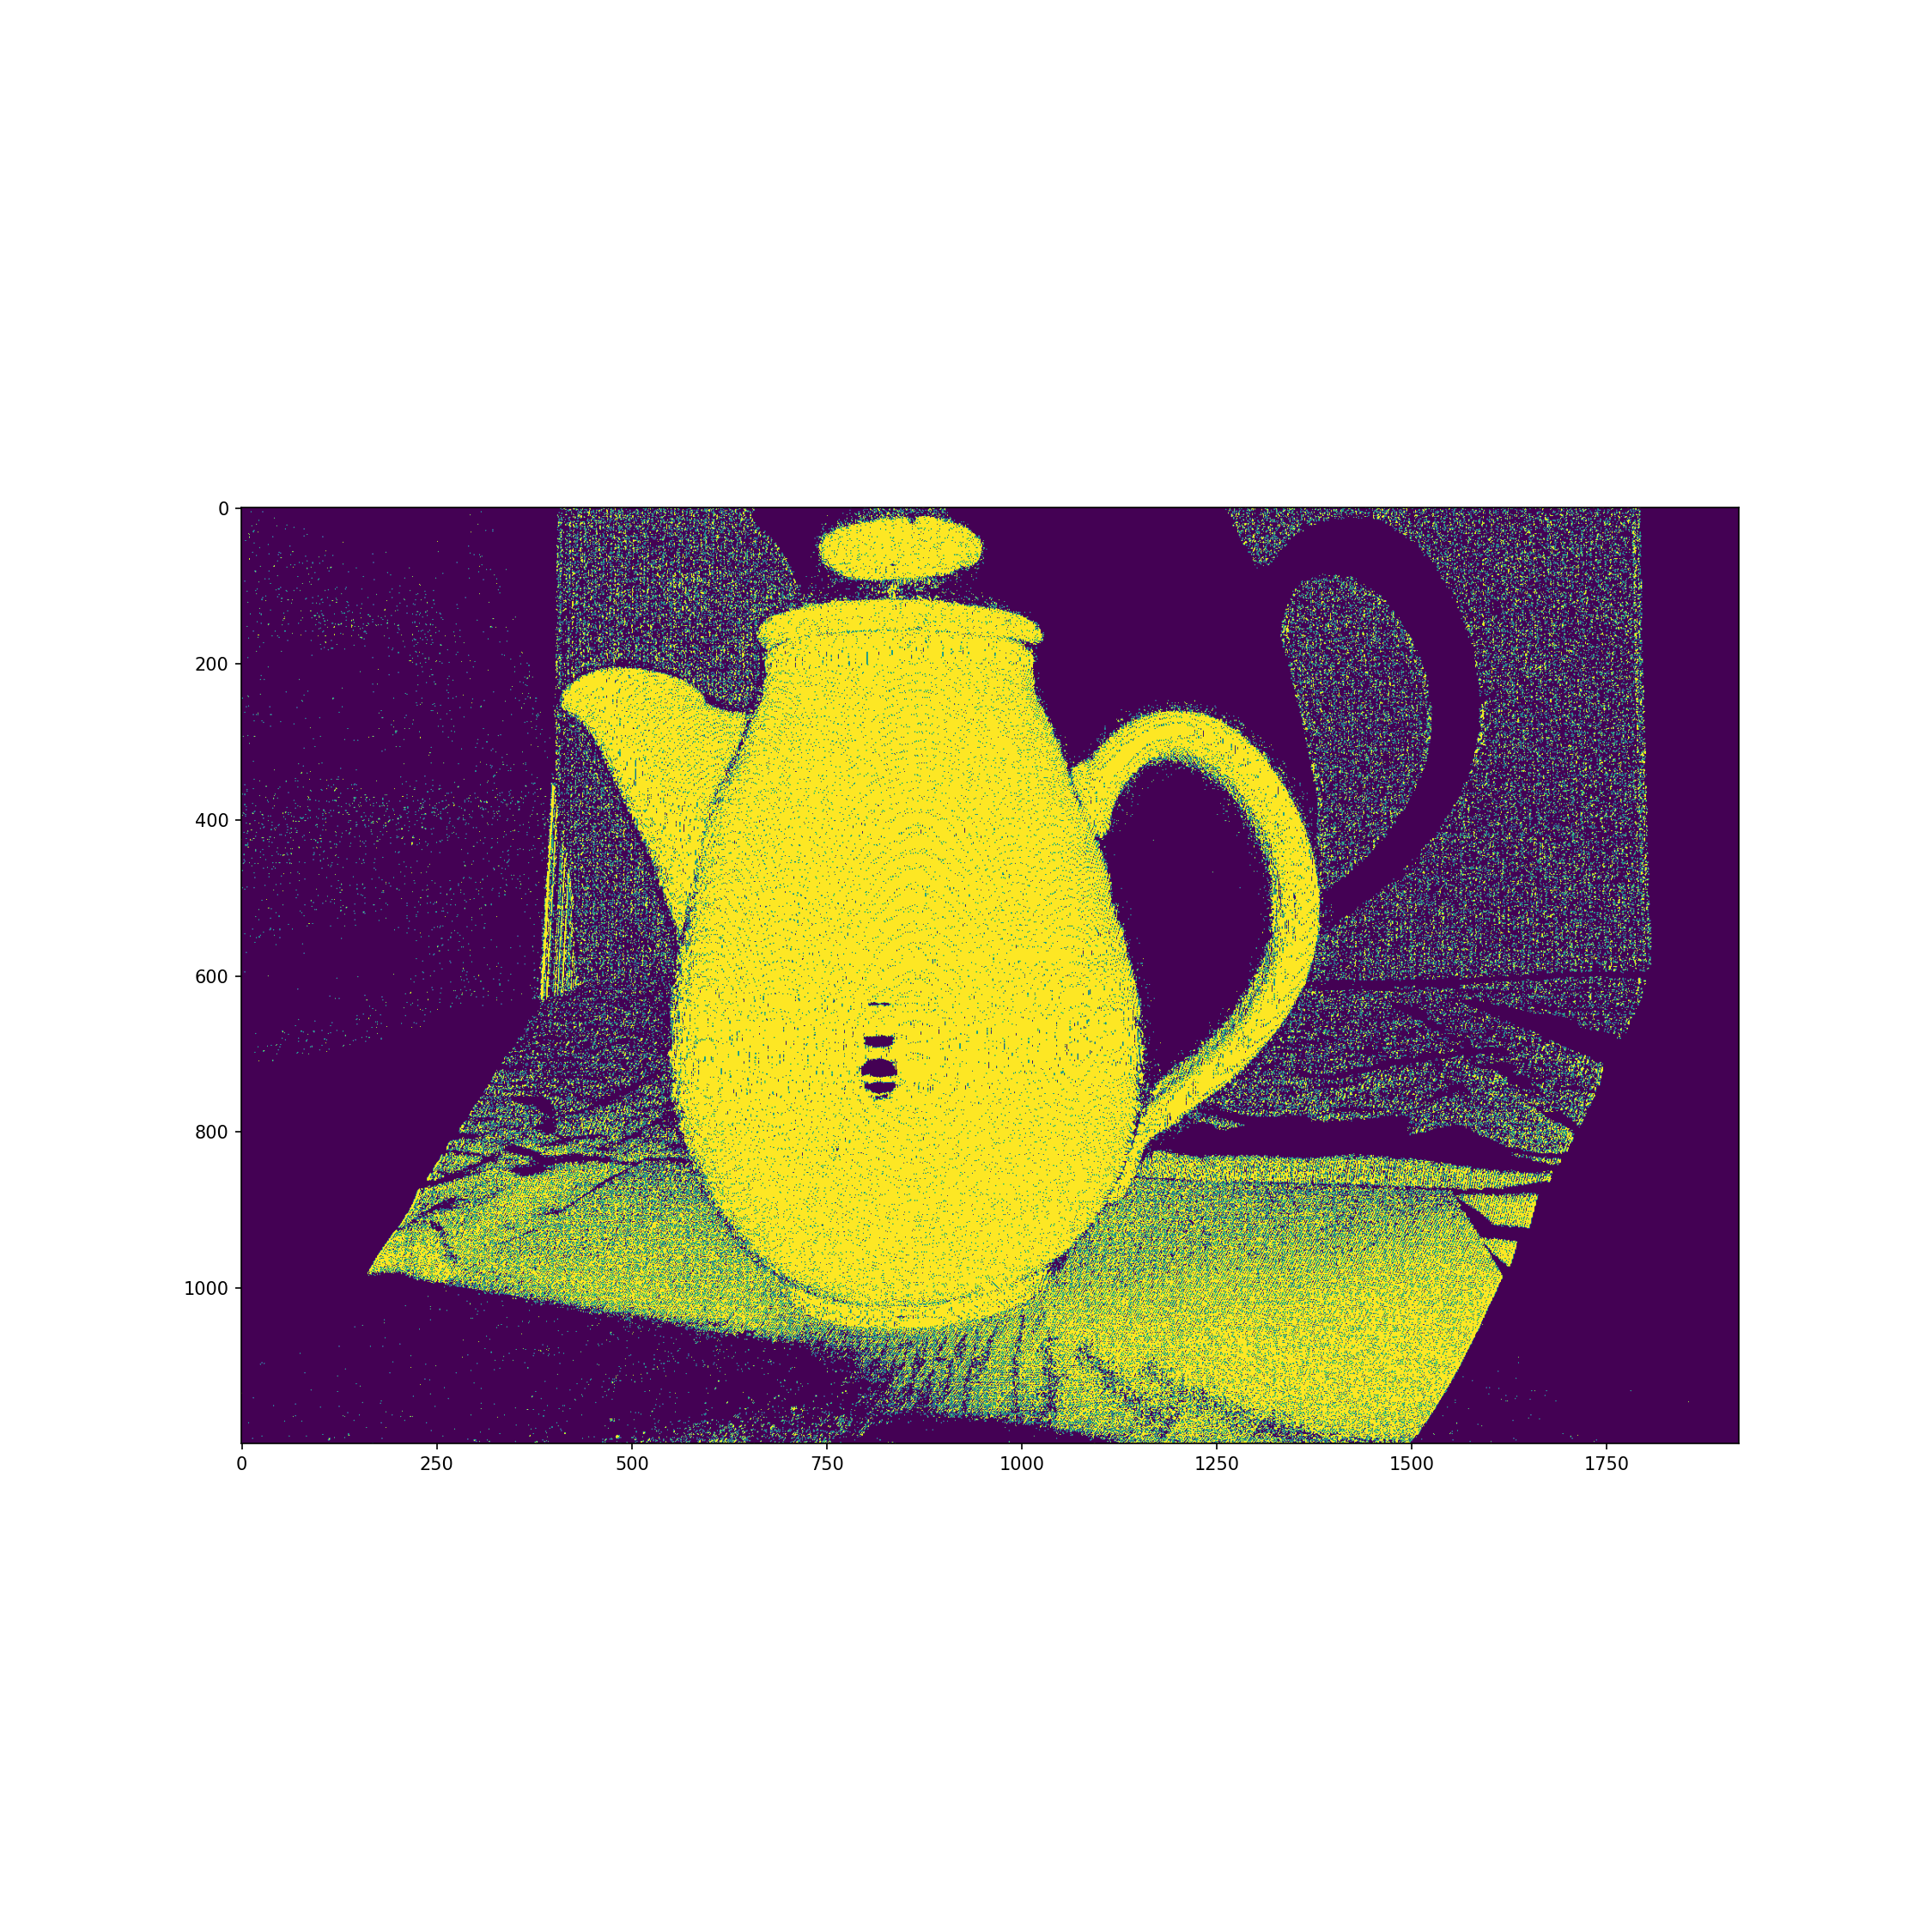

<IPython.core.display.Javascript object>


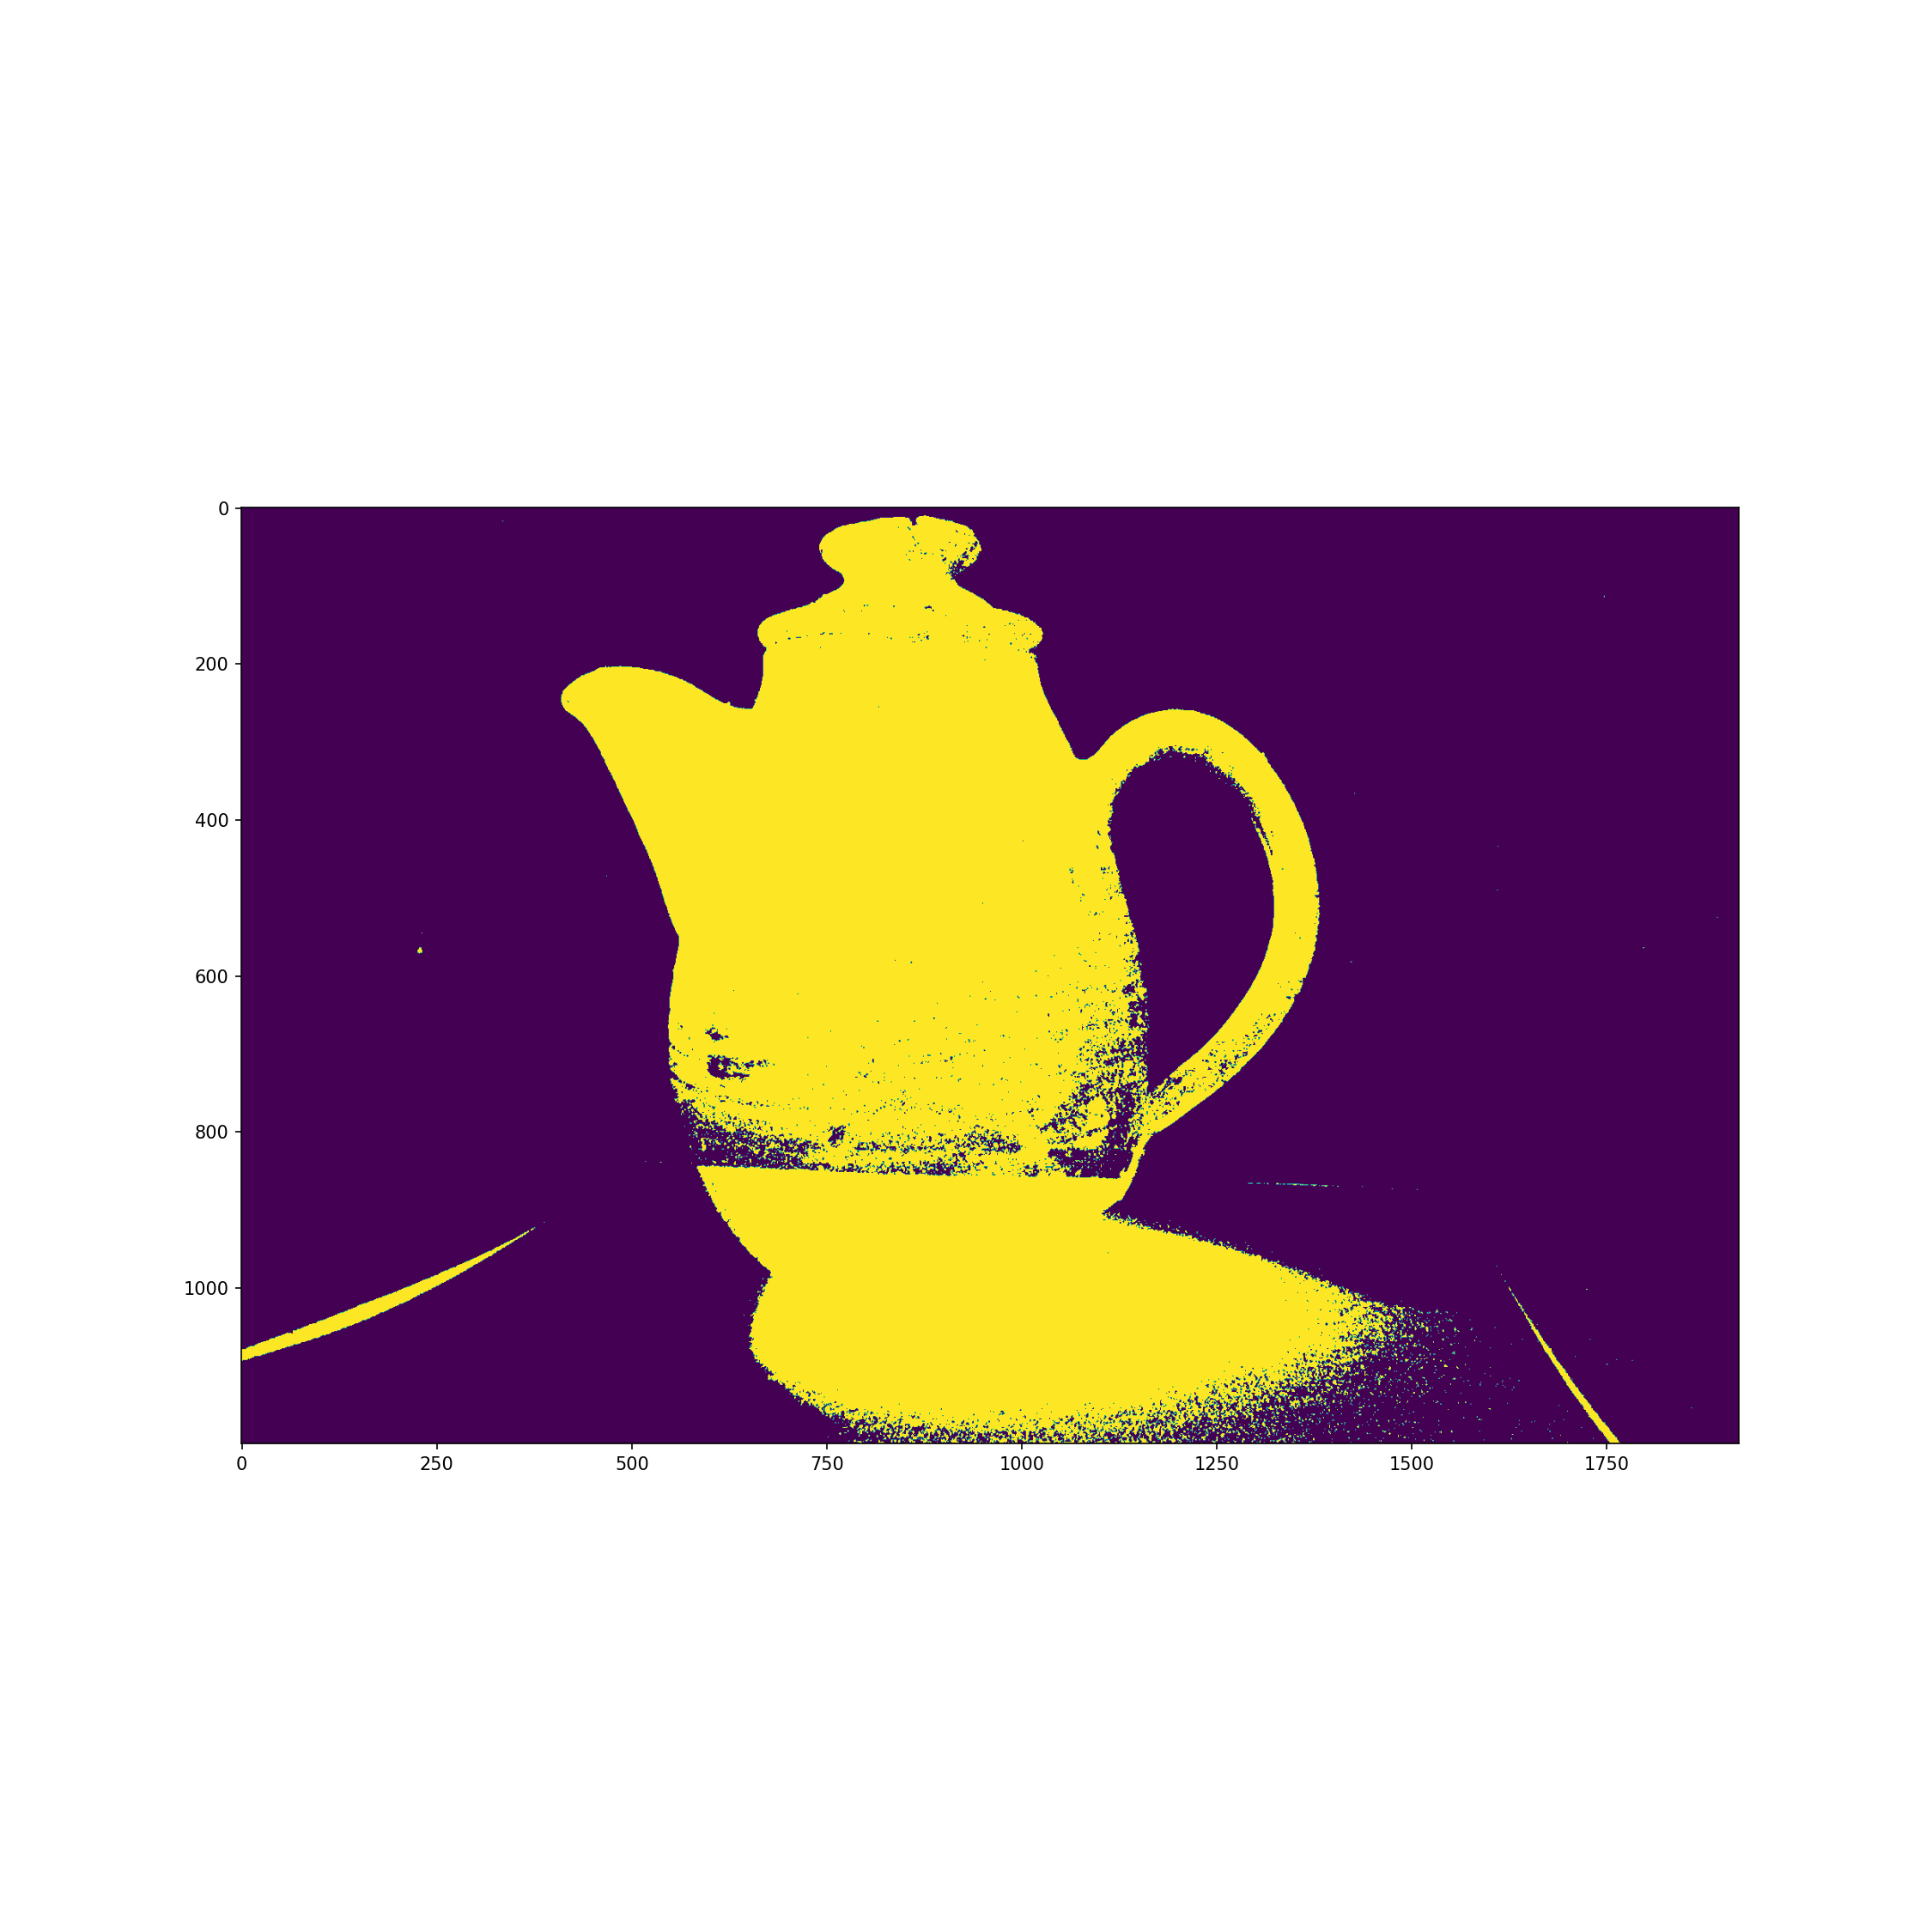

In [3]:
threshold = .005
colorthreshold = 0.02

code, mask, colors = decode("/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/frame_C0_", 0, threshold, 
                            "/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/color_C0_", colorthreshold)

plt.figure()
plt.imshow(code)
plt.figure()
plt.imshow(mask)
plt.figure()
plt.imshow(colors)


loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )



<IPython.core.display.Javascript object>


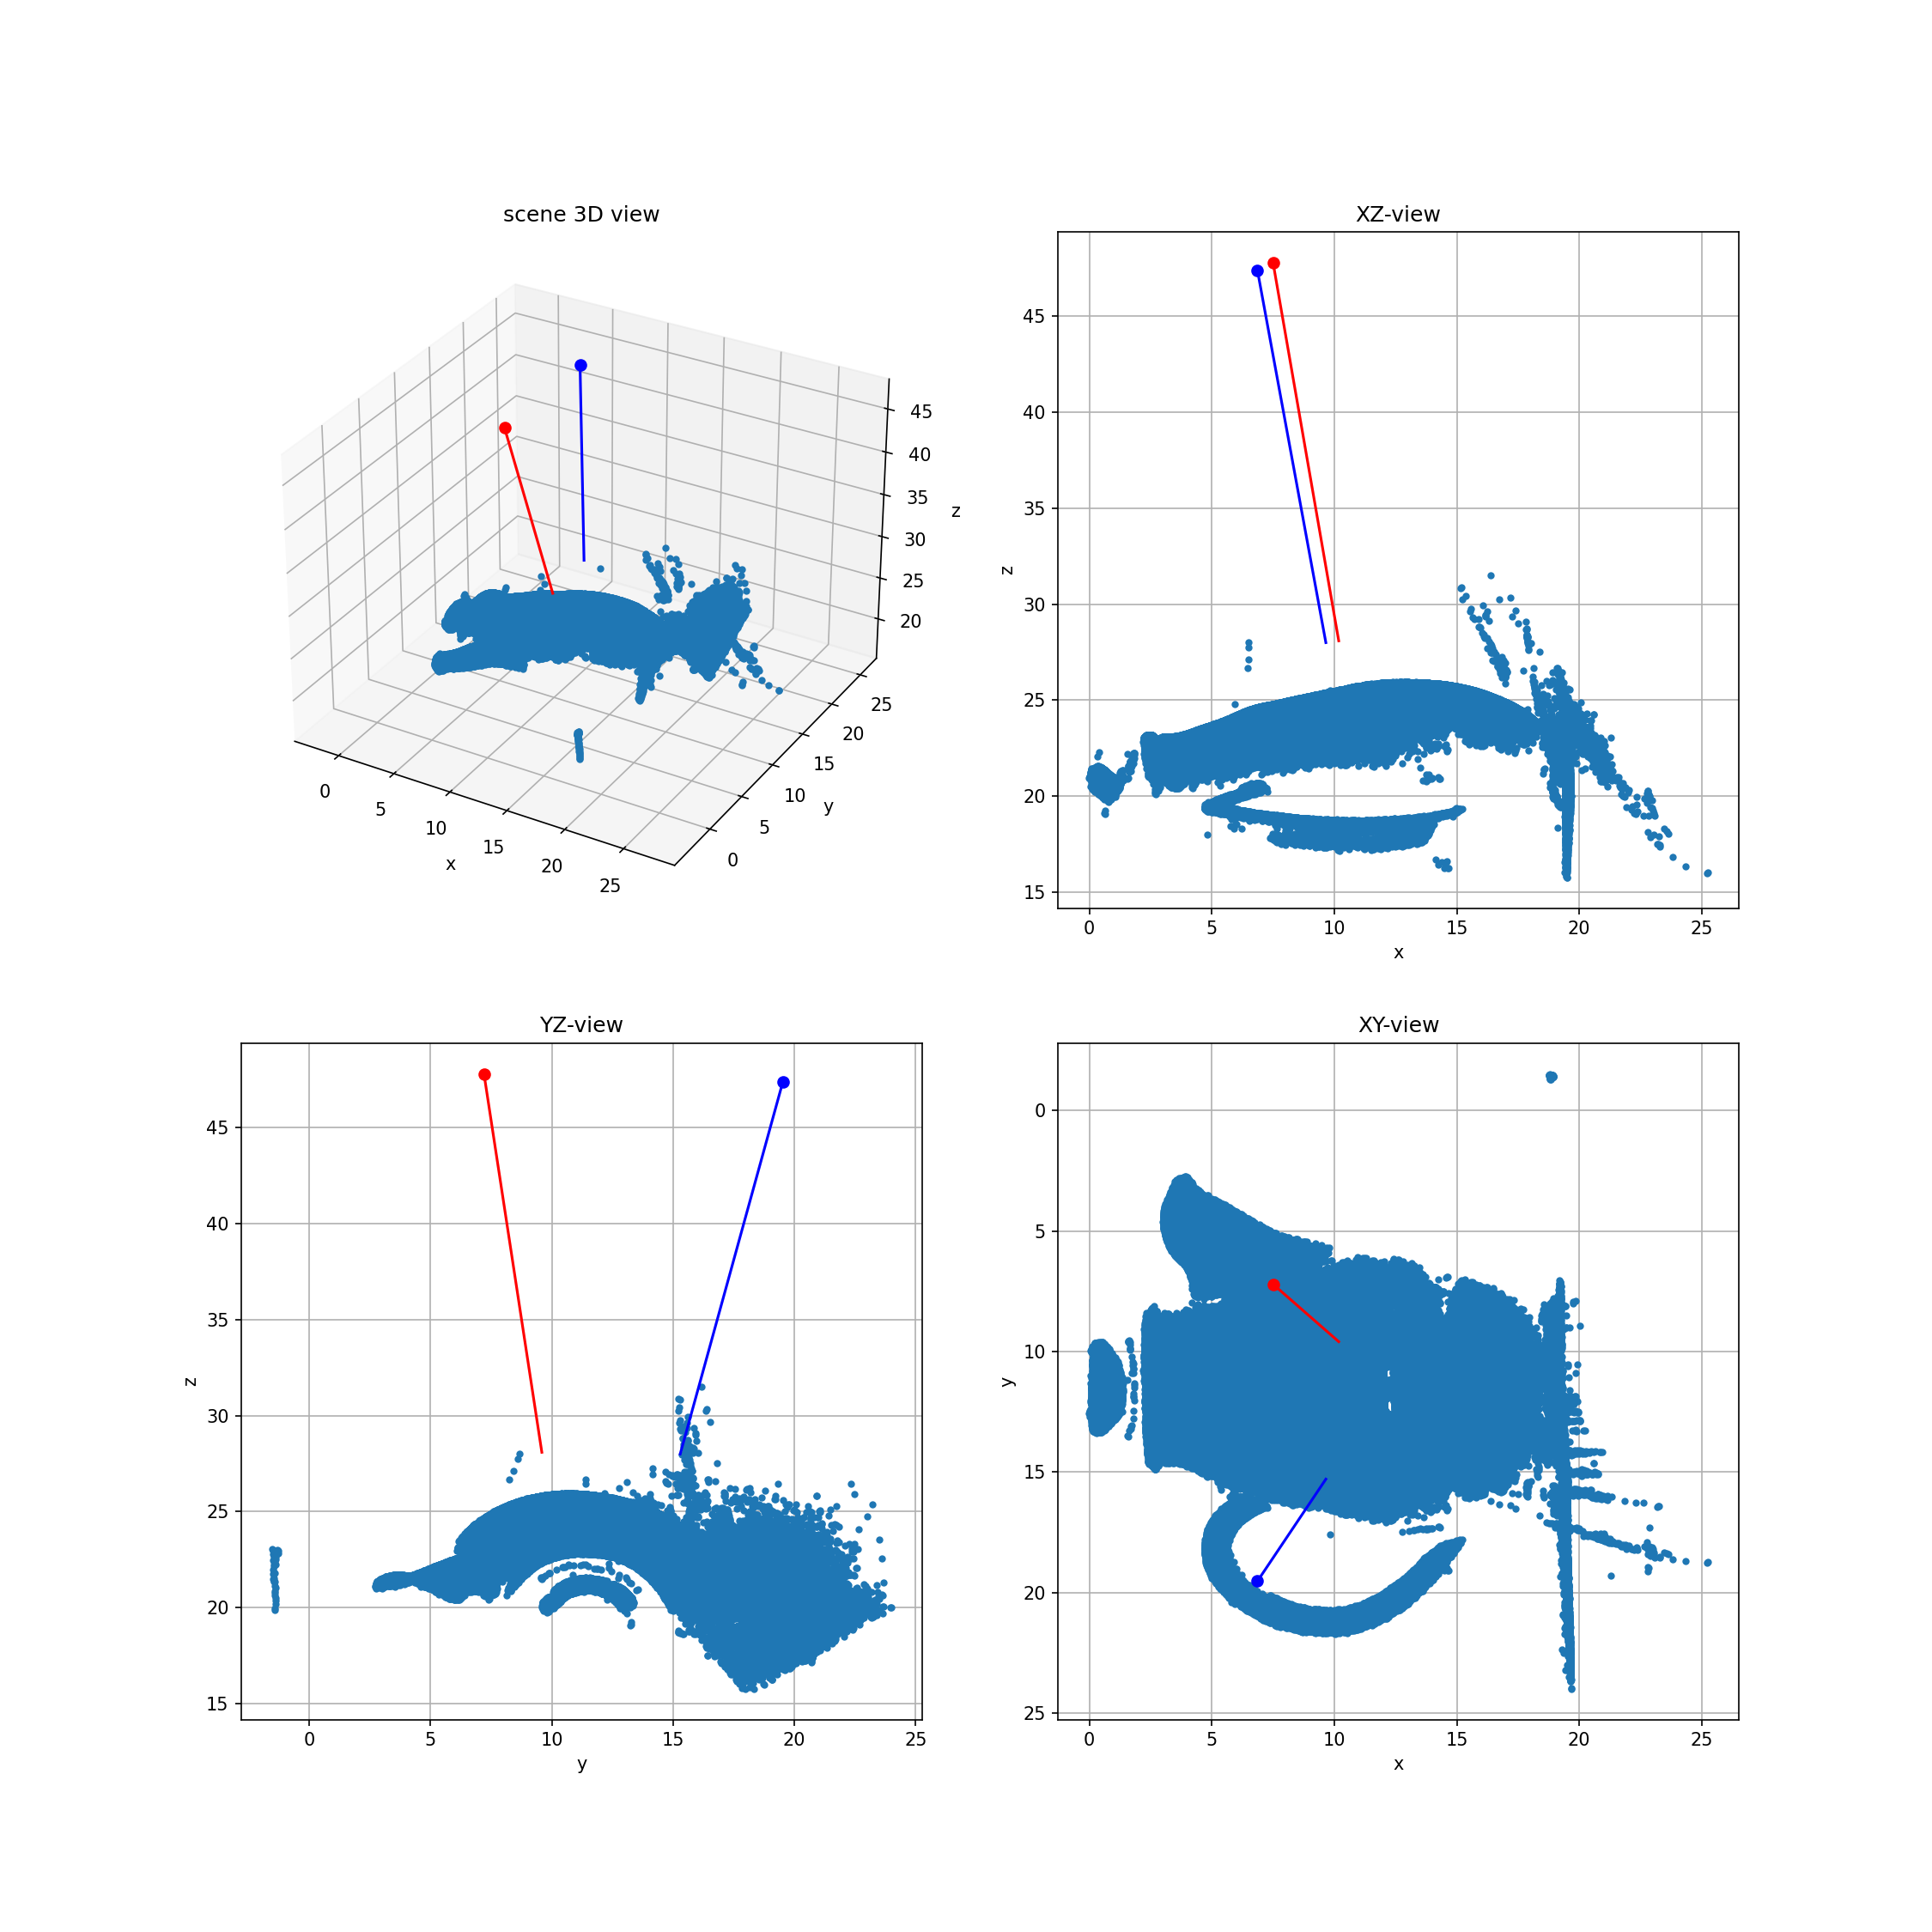

In [4]:
imprefixL = "/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/frame_C0_"
pts2L, pts2R, pts3, rgb = reconstruct("/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/color_C0_",
                                      "/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/frame_C0_",
                                      "/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/color_C1_",
                                      "/Users/jason/Documents/cs178/cs117/project/teapot/grab_0_u/frame_C1_",
                                      threshold, colorthreshold, camL, camR)
                                      
visutils.vis_scene(camL,camR,pts3,looklength=20)

In [6]:

boxlimits = np.array([ 0,20,0,30,0,40])
trithresh = 0.3

image_paths = ["/Users/jason/Documents/cs178/cs117/project/teapot/grab_%d_u/color_C0_",
               "/Users/jason/Documents/cs178/cs117/project/teapot/grab_%d_u/frame_C0_",
               "/Users/jason/Documents/cs178/cs117/project/teapot/grab_%d_u/color_C1_",
               "/Users/jason/Documents/cs178/cs117/project/teapot/grab_%d_u/frame_C1_"]

for i in range(7):
    modified_paths = [path % i for path in image_paths]
    im1, im2, im3, im4 = modified_paths
    
    pts2L, pts2R, pts3, rgb = reconstruct(im1, im2, im3, im4, threshold, colorthreshold, camL, camR)
    
    tri, pts3, bvalues = meshGen(pts3, pts2L, pts2R, trithresh, boxlimits, rgb)
    output_filename = 'mesh%d.ply' % i
    meshutils.writeply(pts3, bvalues, tri, output_filename)


loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )( 14 15 )( 16 17 )( 18 19 )

loading( 20 21 )( 22 23 )( 24 25 )( 26 27 )( 28 29 )( 30 31 )( 32 33 )( 34 35 )( 36 37 )( 38 39 )

loading( 0 1 )( 2 3 )( 4 5 )( 6 7 )( 8 9 )( 10 11 )( 12 13 )

In [ ]:
im1 = read_image(colorprefix + "00.png")
im2 = read_image(colorprefix + "01.png")
colors = ones array of shape (h, w)
colorDiff = sum(square(im1 - im2), axis=-1)
thresholdMask = colorDiff > colorthreshold
colors = colors * thresholdMask